# Анализ влияния LE, PE, OHE кодирования на предсказательную способность supervised-моделей

- Задача бинарной классификации для несбалансированной выборки
- рассматривается максимальное количество моделей
- поля `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `Amount`, `Value`, `PricingStrategy`
- сравниваем результаты LE-кодирования, LE-кодирования со скейлингом, PE-кодирования и OHE

In [1]:
import numpy  as np
import pandas as pd

In [2]:
df_trn = pd.read_csv('../data/training_le.csv')
df_tst = pd.read_csv('../data/test_le.csv')

In [3]:
df_trn.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,36122,3956,886,4405,5,9,0,2,1000.0,1000,2018-11-15 02:18:49,2,0
1,15641,4840,3828,4405,3,5,2,1,-20.0,20,2018-11-15 02:19:08,2,0
2,53940,4228,221,4682,5,0,0,2,500.0,500,2018-11-15 02:44:21,2,0
3,102362,647,2184,987,0,20,9,2,20000.0,21800,2018-11-15 03:32:55,2,0
4,38779,4840,3828,987,3,5,2,1,-644.0,644,2018-11-15 03:34:21,2,0


**Correlation Matrices**

In [4]:
corr = df_trn.corr()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

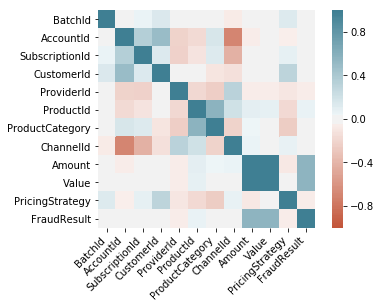

In [6]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
corr.loc[:, :]

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
BatchId,1.000000,0.031850,0.060558,0.144860,-0.034058,-0.017532,-0.037846,-0.063891,-0.013423,0.007764,0.131405,-0.000683
AccountId,0.031850,1.000000,0.352973,0.503405,-0.213127,-0.158946,0.171551,-0.694218,-0.048580,-0.035141,-0.039308,-0.026157
SubscriptionId,0.060558,0.352973,1.000000,0.133708,-0.221204,-0.112645,0.118305,-0.423540,-0.036190,-0.011349,0.083328,-0.010864
CustomerId,0.144860,0.503405,0.133708,1.000000,-0.004948,-0.023494,-0.102622,-0.127159,-0.037375,0.011864,0.302477,-0.004549
ProviderId,-0.034058,-0.213127,-0.221204,-0.004948,1.000000,-0.180489,-0.245062,0.323558,-0.049208,-0.062083,-0.095864,-0.051937
ProductId,-0.017532,-0.158946,-0.112645,-0.023494,-0.180489,1.000000,0.577532,0.203787,0.089368,0.082494,-0.179263,0.063452
ProductCategory,-0.037846,0.171551,0.118305,-0.102622,-0.245062,0.577532,1.000000,-0.211960,0.042541,0.033191,-0.255262,0.027165
ChannelId,-0.063891,-0.694218,-0.423540,-0.127159,0.323558,0.203787,-0.211960,1.000000,0.051903,0.028611,0.075672,0.024972
Amount,-0.013423,-0.048580,-0.036190,-0.037375,-0.049208,0.089368,0.042541,0.051903,1.000000,0.989692,-0.079827,0.557370
Value,0.007764,-0.035141,-0.011349,0.011864,-0.062083,0.082494,0.033191,0.028611,0.989692,1.000000,-0.038703,0.566739


## Common preparing

In [8]:
df_trn = pd.read_csv('../data/training_le.csv')
df_tst = pd.read_csv('../data/test_le.csv')

In [9]:
columns4drop = [
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId',
    'TransactionStartTime'
]

In [10]:
df_trn = df_trn.drop(columns=columns4drop, axis=1)

In [11]:
df_trn.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,5,9,0,2,1000.0,1000,2,0
1,3,5,2,1,-20.0,20,2,0
2,5,0,0,2,500.0,500,2,0
3,0,20,9,2,20000.0,21800,2,0
4,3,5,2,1,-644.0,644,2,0


**Correlation Matrices**

In [12]:
corr = df_trn.corr()

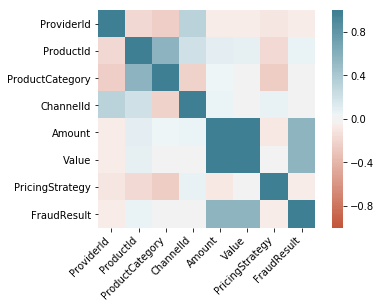

In [13]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
corr.loc[:, :]

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
ProviderId,1.000000,-0.180489,-0.245062,0.323558,-0.049208,-0.062083,-0.095864,-0.051937
ProductId,-0.180489,1.000000,0.577532,0.203787,0.089368,0.082494,-0.179263,0.063452
ProductCategory,-0.245062,0.577532,1.000000,-0.211960,0.042541,0.033191,-0.255262,0.027165
ChannelId,0.323558,0.203787,-0.211960,1.000000,0.051903,0.028611,0.075672,0.024972
Amount,-0.049208,0.089368,0.042541,0.051903,1.000000,0.989692,-0.079827,0.557370
Value,-0.062083,0.082494,0.033191,0.028611,0.989692,1.000000,-0.038703,0.566739
PricingStrategy,-0.095864,-0.179263,-0.255262,0.075672,-0.079827,-0.038703,1.000000,-0.051744
FraudResult,-0.051937,0.063452,0.027165,0.024972,0.557370,0.566739,-0.051744,1.000000


**Scaling**

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
def scaleColumns(data, cols_to_scale, scaler):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])))
    return data

In [17]:
df_trn = scaleColumns(df_trn, ['Amount', 'Value'], RobustScaler())

In [18]:
df_trn.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,5,9,0,2,0.000000,0.000000,2,0
1,3,5,2,1,-0.357895,-0.207407,2,0
2,5,0,0,2,-0.175439,-0.105820,2,0
3,0,20,9,2,6.666667,4.402116,2,0
4,3,5,2,1,-0.576842,-0.075344,2,0


In [19]:
# Classifier Libraries
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier

In [44]:
classifiers = {
    'Naive Bayes                       ': GaussianNB(),
    'k-Nearest Neighbors               ': KNeighborsClassifier(),
    'Decision Tree Classifier          ': DecisionTreeClassifier(),
    'Logisitic Regression              ': LogisticRegression(),
#     'Support Vector Classifier, Linear ': SVC(kernel="linear"),
    'Support Vector Classifier, RBF    ': SVC(kernel="rbf"),
    'AdaBoost Classifier               ': AdaBoostClassifier(),
    'Bagging Classifier                ': BaggingClassifier(),
    'Extra-Trees Classifier            ': ExtraTreesClassifier(),
    'Gradient Boosting                 ': GradientBoostingClassifier(),
    'Random Forest                     ': RandomForestClassifier(),
#     'Histogram-based GradBoostClassTree': HistGradientBoostingClassifier(),
#     'Gaussian Process Classifier       ': GaussianProcessClassifier(kernel=1.0 * RBF(1.0)),
    'Linear Discriminant Analysis      ': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis   ': QuadraticDiscriminantAnalysis(),
    'Multilayer Perceptron             ': MLPClassifier()
}

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.model_selection import cross_validate

In [23]:
def running_binary_classifiers(X_trn, y_trn):
    print('Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time')
    print('-'*105)
    # iterate over classifiers
    for name, classifier in classifiers.items():
        classifier.fit(X_trn.values, y_trn.values)
        cv_results = cross_validate(classifier, X_trn.values, y_trn.values,
                                    scoring=('precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'),
                                    cv=5, n_jobs=-1)

        precision    = cv_results['test_precision'].mean()
        recall       = cv_results['test_recall'].mean()
        f1           = cv_results['test_f1'].mean()
        bal_accuracy = cv_results['test_balanced_accuracy'].mean()
        roc_auc      = cv_results['test_roc_auc'].mean()
        fit_time     = cv_results['fit_time'].sum()
        print('%s %10.4f %10.4f %10.4f %10.4f %10.4f %10.4f' % 
              (name, precision, recall, f1, bal_accuracy, roc_auc, fit_time))
        
    print('-'*105)
    return

In [24]:
from sklearn.model_selection import train_test_split

### Only `Amount`

In [25]:
columns4drop = [
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'Value',
    'PricingStrategy',
]

In [26]:
df = df_trn.drop(columns=columns4drop, axis=1)

In [27]:
df.head()

,Amount,FraudResult
0,0.000000,0
1,-0.357895,0
2,-0.175439,0
3,6.666667,0
4,-0.576842,0


In [28]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [87]:
from collections import Counter
print('Train Label Distribution: {}'.format(Counter(y_train)))

Train Label Distribution: Counter({0: 76380, 1: 149})


In [31]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.4060     0.9117     0.5575     0.9545     0.9928     0.0116
k-Nearest Neighbors                    0.9169     0.7575     0.8212     0.8787     0.9321     1.1603
Decision Tree Classifier               0.9512     0.7910     0.8581     0.8955     0.9648     0.1443
Logisitic Regression                   0.6838     0.3021     0.4090     0.6509     0.9687     0.4094
Support Vector Classifier, RBF         0.9909     0.6639     0.7893     0.8319     0.9126     2.7479
AdaBoost Classifier                    0.9363     0.7572     0.8274     0.8786     0.9794     3.0534
Bagging Classifier                     0.9576     0.7708     0.8481     0.8854     0.9685     0.8347
Extra-Trees Classifier                 0.9406     0.7977     0.8563     0.8988     0

### Only `Amount` and `Value`

In [32]:
columns4drop = [
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'PricingStrategy',
]

In [33]:
df = df_trn.drop(columns=columns4drop, axis=1)

In [34]:
df.head()

,Amount,Value,FraudResult
0,0.000000,0.000000,0
1,-0.357895,-0.207407,0
2,-0.175439,-0.105820,0
3,6.666667,4.402116,0
4,-0.576842,-0.075344,0


In [35]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [37]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.3392     0.9186     0.4932     0.9575     0.9908     0.0510
k-Nearest Neighbors                    0.9169     0.7575     0.8212     0.8787     0.9321     1.5608
Decision Tree Classifier               0.9637     0.7979     0.8693     0.8989     0.9685     0.2017
Logisitic Regression                   0.6549     0.3021     0.4027     0.6508     0.9906     0.5178
Support Vector Classifier, RBF         0.9909     0.6570     0.7837     0.8285     0.9739     3.0239
AdaBoost Classifier                    0.9720     0.7713     0.8561     0.8856     0.9882     4.3056
Bagging Classifier                     0.9456     0.7979     0.8601     0.8989     0.9686     1.2545
Extra-Trees Classifier                 0.9515     0.7977     0.8622     0.8988     0

### LE-coding
 of fields: `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`

`RobustScaler` of fields: `Amount`, `Value`

In [39]:
df = df_trn

In [40]:
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,5,9,0,2,0.000000,0.000000,2,0
1,3,5,2,1,-0.357895,-0.207407,2,0
2,5,0,0,2,-0.175439,-0.105820,2,0
3,0,20,9,2,6.666667,4.402116,2,0
4,3,5,2,1,-0.576842,-0.075344,2,0


In [41]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [45]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.2885     0.9120     0.4371     0.9538     0.9813     0.2133
k-Nearest Neighbors                    0.9229     0.7508     0.8201     0.8753     0.9388     2.7040
Decision Tree Classifier               0.9059     0.8179     0.8566     0.9089     0.9591     0.2662
Logisitic Regression                   0.6519     0.3154     0.4180     0.6575     0.9819     2.3267
Support Vector Classifier, RBF         0.9757     0.5830     0.7214     0.7915     0.9705     9.6657
AdaBoost Classifier                    0.9029     0.7979     0.8420     0.8989     0.9859     5.5921
Bagging Classifier                     0.8778     0.8113     0.8371     0.9055     0.9625     1.3689
Extra-Trees Classifier                 0.8793     0.7575     0.8065     0.8786     0

### LE-coding with `MinMaxScaler`
`MinMaxScaler` of fields: `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`

`RobustScaler` of fields: `Amount`, `Value`

In [46]:
columns4MinMaxScaler = [
    'ProviderId',
    'ProductId', 
    'ProductCategory', 
    'ChannelId',
    'PricingStrategy'
]

In [48]:
# int --> float
for clm in columns4MinMaxScaler:
    df[clm] = df[clm].astype(float)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
df = scaleColumns(df, columns4MinMaxScaler, MinMaxScaler())

In [52]:
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,1.0,0.346154,0.000000,0.50,0.000000,0.000000,0.666667,0
1,0.6,0.192308,0.222222,0.25,-0.357895,-0.207407,0.666667,0
2,1.0,0.000000,0.000000,0.50,-0.175439,-0.105820,0.666667,0
3,0.0,0.769231,1.000000,0.50,6.666667,4.402116,0.666667,0
4,0.6,0.192308,0.222222,0.25,-0.576842,-0.075344,0.666667,0


In [53]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [55]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.2885     0.9120     0.4371     0.9538     0.9813     0.2435
k-Nearest Neighbors                    0.9229     0.7508     0.8200     0.8753     0.9489     3.1496
Decision Tree Classifier               0.9184     0.8179     0.8628     0.9089     0.9591     0.2647
Logisitic Regression                   0.6624     0.3087     0.4126     0.6542     0.9851     1.3959
Support Vector Classifier, RBF         0.9909     0.6770     0.7995     0.8385     0.9551     3.9364
AdaBoost Classifier                    0.9029     0.7979     0.8420     0.8989     0.9859     5.5876
Bagging Classifier                     0.8941     0.7977     0.8382     0.8988     0.9659     1.3704
Extra-Trees Classifier                 0.8878     0.7710     0.8216     0.8854     0

### PE-coding
PE-coding of fields: `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`

`RobustScaler` of fields: `Amount`, `Value`

In [164]:
df_trn = pd.read_csv('../data/training_pe.csv')

In [165]:
columns4drop = [
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId',
    'TransactionStartTime'
]

In [166]:
df = df_trn.drop(columns=columns4drop, axis=1)

In [167]:
corr = df.corr()

In [168]:
corr.loc[:, :]

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
ProviderId,1.000000,0.431501,0.055983,0.351579,0.101481,0.090819,0.090441,0.096593
ProductId,0.431501,1.000000,0.408706,0.312663,0.115833,0.108577,0.101003,0.114756
ProductCategory,0.055983,0.408706,1.000000,-0.408862,0.044579,0.033895,0.041255,0.046902
ChannelId,0.351579,0.312663,-0.408862,1.000000,0.071267,0.041002,0.045133,0.034980
Amount,0.101481,0.115833,0.044579,0.071267,1.000000,0.989692,0.144769,0.557370
Value,0.090819,0.108577,0.033895,0.041002,0.989692,1.000000,0.142178,0.566739
PricingStrategy,0.090441,0.101003,0.041255,0.045133,0.144769,0.142178,1.000000,0.129977
FraudResult,0.096593,0.114756,0.046902,0.034980,0.557370,0.566739,0.129977,1.000000


In [169]:
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,0.000088,0.000390,0.000400,0.003232,1000.0,1000,0.001741,0
1,0.000131,0.000031,0.003546,0.000135,-20.0,20,0.001741,0
2,0.000088,0.000000,0.000400,0.003232,500.0,500,0.001741,0
3,0.010101,0.002646,0.006250,0.003232,20000.0,21800,0.001741,0
4,0.000131,0.000031,0.003546,0.000135,-644.0,644,0.001741,0


**Scaling**

Вычисляем "предсказательную способность" данного значения, то есть угадывает ли он `frauds` и лучше, чем просто среднее

Для этого смотрим как часто этот признак сигнализирует о `frauds` и вычитаем частоту `frauds` во всей выборке

In [170]:
columns4scaling = [
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'PricingStrategy'
]

In [171]:
print('Label Distribution: {}'.format(Counter(df['FraudResult'])))

Label Distribution: Counter({0: 95469, 1: 193})


In [172]:
n_nofrauds = Counter(df['FraudResult'])[0]
n_frauds   = Counter(df['FraudResult'])[1]
coef = n_frauds / (n_frauds + n_nofrauds) 
for clm in columns4scaling:
    df[clm] -= coef

In [173]:
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,-0.001930,-0.001628,-0.001618,0.001214,1000.0,1000,-0.000277,0
1,-0.001887,-0.001987,0.001528,-0.001883,-20.0,20,-0.000277,0
2,-0.001930,-0.002018,-0.001618,0.001214,500.0,500,-0.000277,0
3,0.008083,0.000628,0.004232,0.001214,20000.0,21800,-0.000277,0
4,-0.001887,-0.001987,0.001528,-0.001883,-644.0,644,-0.000277,0


In [174]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [176]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.3392     0.9186     0.4932     0.9575     0.9909     0.2467
k-Nearest Neighbors                    0.9265     0.7308     0.8096     0.8653     0.9489     2.0410
Decision Tree Classifier               0.9066     0.8246     0.8603     0.9122     0.9625     0.3216
Logisitic Regression                   0.6549     0.3021     0.4027     0.6508     0.9907     4.3279
Support Vector Classifier, RBF         0.9826     0.6570     0.7807     0.8285     0.9155    34.7157
AdaBoost Classifier                    0.9000     0.7708     0.8245     0.8853     0.9839     6.3565
Bagging Classifier                     0.9073     0.8244     0.8586     0.9121     0.9625     1.4209
Extra-Trees Classifier                 0.8771     0.7708     0.8148     0.8853     0

**Old Results**

In [69]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.3392     0.9186     0.4932     0.9575     0.9909     0.2156
k-Nearest Neighbors                    0.9265     0.7308     0.8096     0.8653     0.9489     1.8701
Decision Tree Classifier               0.9072     0.8246     0.8608     0.9122     0.9625     0.2709
Logisitic Regression                   0.6549     0.3021     0.4027     0.6508     0.9905     3.7465
Support Vector Classifier, RBF         0.9826     0.6570     0.7807     0.8285     0.9030    30.9235
AdaBoost Classifier                    0.9000     0.7708     0.8245     0.8853     0.9839     5.6463
Bagging Classifier                     0.8878     0.8513     0.8630     0.9255     0.9659     1.2370
Extra-Trees Classifier                 0.8790     0.7841     0.8235     0.8920     0

### OHE-coding
 of fields: `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`

`RobustScaler` of fields: `Amount`, `Value`

In [71]:
df_trn = pd.read_csv('../data/training_ohe_short.csv')

In [73]:
columns4drop = [
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId',
    'TransactionStartTime'
]

In [74]:
df = df_trn.drop(columns=columns4drop, axis=1)

In [75]:
df.head()

,Amount,Value,FraudResult,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductId_0,...,ProductCategory_9,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_4,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_3
0,1000.0,1000,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,-20.0,20,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,500.0,500,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,20000.0,21800,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,-644.0,644,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=y)

In [78]:
running_binary_classifiers(X_train, y_train)

Classifiers                            Precision  Recall     F1-score   b_accuracy ROC_AUC    Fit-time
---------------------------------------------------------------------------------------------------------
Naive Bayes                            0.3392     0.9186     0.4932     0.9575     0.9888     0.8789
k-Nearest Neighbors                    0.8896     0.7508     0.8081     0.8753     0.9489     3.5580
Decision Tree Classifier               0.9065     0.8179     0.8571     0.9089     0.9591     1.7471
Logisitic Regression                   0.6350     0.3085     0.4098     0.6541     0.9858     4.8762
Support Vector Classifier, RBF         0.9826     0.6434     0.7709     0.8217     0.9473   195.5727
AdaBoost Classifier                    0.8960     0.7913     0.8360     0.8955     0.9837    24.3750
Bagging Classifier                     0.9045     0.8246     0.8581     0.9122     0.9693     5.8956
Extra-Trees Classifier                 0.8802     0.7372     0.7941     0.8685     0